In [1]:
%matplotlib inline
from ecell4 import *

In [2]:
def func(reactants, products, volume, t, rr):
    k = 1.0
    retval = k * volume
    for num in reactants:
        retval *= num / volume
    return retval

In [3]:
sp1, sp2, sp3 = Species("A"), Species("B"), Species("C")
rr1 = create_unbinding_reaction_rule(sp1, sp2, sp3, 1.0)

In [4]:
rr2 = ode.ODEReactionRule(rr1)
rr2.set_ratelaw(ode.ODERatelawCallback(func))
# rr2.set_ratelaw(ode.ODERatelawMassAction(1.0))

In [5]:
m1 = NetworkModel()
m1.add_reaction_rule(rr1)

m2 = ode.ODENetworkModel()
m2.add_reaction_rule(rr2)

In [6]:
obs1 = run_simulation(10.0, model=m1, y0={"A": 60}, return_type="observer")
obs2 = run_simulation(range(11), model=m2, y0={"A": 60}, return_type="observer")

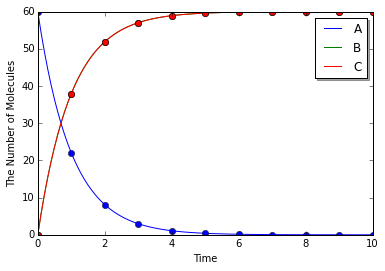

In [7]:
viz.plot_number_observer(obs1, "-", obs2, "o")